# Mock Belt Exam - Data Visualization Stack

# Part 1

**Download and unzip the zip file provided to you here: https://drive.google.com/file/d/1qszDl9TklrXD1kHuu7vtJXsEm2lwbIQ-/view?usp=share_link.
Unzip the files into your private repository.**

In [1]:
# imports
import joblib, sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# !pip install scikit-learn

In [3]:
# check version of sklearn
print(sklearn.__version__)

1.2.2


In [4]:
# # use cell if should revert to sklearn ver 1.1.3
# !pip install scikit-learn==1.2.2
# # restart kernel

**Load the provided joblib file. Display the .keys of the dictionary stored in the joblib file.**

In [5]:
# load joblib file
loaded = joblib.load('Data/saved_model.joblib')

# display keys of dict in joblib file
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

**Assign each of the keys from the dictionary as a separate variable.**

In [6]:
preprocessor = loaded['preprocessor']
X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']
LinearRegression = loaded['LinearRegression']
RandomForestRegressor = loaded['RandomForestRegressor']

**Use the preprocessor to transform the X_train/X_test data into processed dataframes. Replace the column names with the correct feature names extracted from the preprocessor.**

In [7]:
display(X_train.head())
display(X_test.head())

,fueltype,enginelocation,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg
64,gas,front,177.8,66.5,55.5,2425,4,84,4800,26,32
32,gas,front,150.0,64.0,52.6,1837,4,60,5500,38,42
165,gas,front,168.7,64.0,52.6,2265,4,112,6600,26,29
39,gas,front,175.4,65.2,54.1,2304,4,86,5800,27,33
202,gas,front,188.8,68.9,55.5,3012,6,134,5500,18,23


,fueltype,enginelocation,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg
101,gas,front,181.7,66.5,55.1,3095,6,152,5200,17,22
111,gas,front,186.7,68.4,56.7,3075,4,95,5000,19,24
142,gas,front,172.0,65.4,52.5,2190,4,82,4400,28,33
34,gas,front,150.0,64.0,52.6,1956,4,76,6000,30,34
27,gas,front,157.3,63.8,50.6,2191,4,102,5500,24,30


In [8]:
# feature_names = LinearRegression.feature_names_in_
feature_names = preprocessor.get_feature_names_out()

In [9]:
X_train_proc = pd.DataFrame(preprocessor.transform(X_train),
                            columns = feature_names,
                            index = X_train.index)
X_test_proc = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names,
                           index = X_test.index)

# check
display(X_train_proc.head())
display(X_test_proc.head())

,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
64,177.8,66.5,55.5,2425.0,4.0,84.0,4800.0,26.0,32.0,1.0,0.0
32,150.0,64.0,52.6,1837.0,4.0,60.0,5500.0,38.0,42.0,1.0,0.0
165,168.7,64.0,52.6,2265.0,4.0,112.0,6600.0,26.0,29.0,1.0,0.0
39,175.4,65.2,54.1,2304.0,4.0,86.0,5800.0,27.0,33.0,1.0,0.0
202,188.8,68.9,55.5,3012.0,6.0,134.0,5500.0,18.0,23.0,1.0,0.0


,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
101,181.7,66.5,55.1,3095.0,6.0,152.0,5200.0,17.0,22.0,1.0,0.0
111,186.7,68.4,56.7,3075.0,4.0,95.0,5000.0,19.0,24.0,1.0,0.0
142,172.0,65.4,52.5,2190.0,4.0,82.0,4400.0,28.0,33.0,1.0,0.0
34,150.0,64.0,52.6,1956.0,4.0,76.0,6000.0,30.0,34.0,1.0,0.0
27,157.3,63.8,50.6,2191.0,4.0,102.0,5500.0,24.0,30.0,1.0,0.0


## Explain the Linear Regression Model

**Extract the coefficients and save them as a Series with the correct feature names as the index.**

In [10]:
# helper function
def get_coefs_linreg(lin_reg, 
                     feature_names = None, 
                     sort = True,
                     ascending = True, 
                     name = 'LinearRegression Coefficients'):
    """Gets coefficients and intercept from the fit linear regression"""
    """Source: Coding Dojo Learn Platform"""
    
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
        
    ## Saving the coefficients
    coefs = pd.Series(lin_reg.coef_, index = feature_names)
    coefs['intercept'] = lin_reg.intercept_
    if sort == True:
        coefs = coefs.sort_values(ascending = ascending)
    return coefs

In [11]:
# check that the number of coefficients is equal to the
# number of columns (feature names)
print(len(LinearRegression.coef_))
print(len(feature_names))

11
11


In [12]:
# make coefficients into a pandas series
coefs = get_coefs_linreg(LinearRegression, 
                         feature_names = feature_names,
                         ascending = False)

# check
coefs

enginelocation_rear    13927.989567
cylindernumber          1394.020962
citympg                  154.591791
carwidth                 111.220545
horsepower                36.441994
curbweight                 6.404386
intercept                  0.000000
peakrpm                   -0.169803
carlength                -16.312546
carheight               -157.756527
highwaympg              -318.085169
fueltype_gas           -2856.993904
dtype: float64

**Change the pandas option for float format to display the coefficients with pandas in a readable form: separator for thousands, and 2 decimal places.**

In [13]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

# check
coefs

enginelocation_rear   13,927.99
cylindernumber         1,394.02
citympg                  154.59
carwidth                 111.22
horsepower                36.44
curbweight                 6.40
intercept                  0.00
peakrpm                   -0.17
carlength                -16.31
carheight               -157.76
highwaympg              -318.09
fueltype_gas          -2,856.99
dtype: float64

**Create a bar graph of the coefficients, sorted from largest to smallest.**

In [14]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Source: Coding Dojo Learn Platform"""
    
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:,.2f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [15]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    Source: Coding Dojo Learn Platform"""
    
    # initialize title
    title = 'title'
    
    # Drop intercept if intercept=False and intercept name in coeffs index
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
        title = 'Without Intercept'
    
    # plot all coeffs
    if top_n == None:
        
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        if title == 'title':
            title = "All Coefficients - Ranked by Magnitude"
        else:
            title = "All Coefficients Without Intercept - Ranked by Magnitude"
    
    # plot specified number of coeffs
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        if title == 'title':
            title = f"Top {top_n} Largest Coefficients"
        else:
            title = f"Top {top_n} Largest Coefficients Without Intercept"
        
    ## plot
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

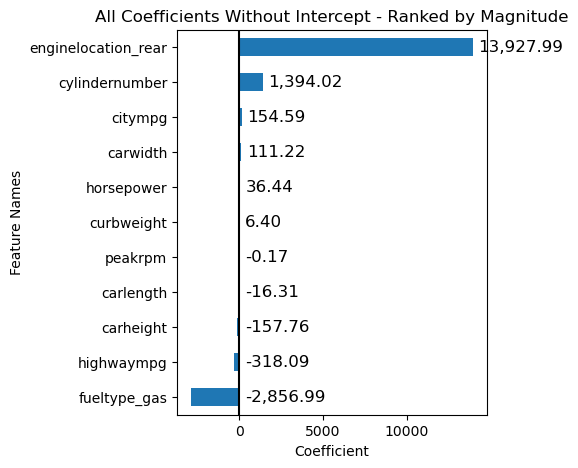

In [16]:
plot_coeffs(coefs, 
            top_n=None, 
            figsize=(4,5),
            intercept=False,  
            intercept_name="intercept",
            annotate=True, 
            ha='left', 
            va='center', 
            size=12,
            xytext=(4,0), 
            textcoords='offset points');

**Provide a quantitative interpretation (both magnitude and directionality) of the three largest positive coefficients explaining how that feature impacts the target.**

Interpretation from supermarket sales project (example):

The three largest coefficients plotted above are all one-hot encoded categorical features. This means their coefficients can be interpreted as how much the target changes if the observation belongs to that category. For the three categories above (largest to smallest):

If the observation belongs to 'Outlet_Type_Supermarket Type 1', then the target sales will increase by 1006.523 rupees.

If the observation belongs to 'Outlet_Type_Supermarket Type 2', then the target sales will increase by 849.785 rupees.

If the observation belongs to 'Outlet_Identifier_OUT027', then the target sales will increase by 849.785 rupees.

Note: The fact that the categories 'Outlet_Type_Supermarket Type 2' and 'Outlet_Identifier_OUT027' have the exact same coefficients tells me that there is probably collinearity between those categories and the data should be iterated on to remove that collinearity. For now, I will leave it as-is.

**Provide a quantitative interpretation (both magnitude and directionality)  of the three largest negative coefficients explaining how that feature impacts the target.**

In [17]:
# # save visualization
# fig = ax.get_figure()
# fig.savefig('Images/linear_regression_top_3_coefficients.png',
#            bbox_inches = 'tight' # figure will not be cropped
#            )

## Explain the Random Forest Model

**Extract and create a bar graph of the feature importances, sorted from largest to smallest.**

In [18]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    """Gets importances from a tree-based model
    Source: Coding Dojo Learn Platform"""

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [19]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    """Plots given importances
    Source: Coding Dojo Learn Platform"""
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [20]:
type(RandomForestRegressor)

sklearn.ensemble._forest.RandomForestRegressor

In [21]:
# # see if this makes a difference
# RandomForestRegressor.fit(X_train_proc, y_train)
# # or:
# # RandomForestRegressor.fit(X_train, y_train)

In [22]:
# get importances
importances = get_importances(RandomForestRegressor, 
                              sort = True,
                              ascending = False,
                              name = 'RandomForest Importances')

# check
importances

horsepower            0.32
curbweight            0.28
highwaympg            0.14
carwidth              0.11
cylindernumber        0.08
citympg               0.03
carlength             0.02
peakrpm               0.02
carheight             0.01
enginelocation_rear   0.00
fueltype_gas          0.00
Name: RandomForest Importances, dtype: float64

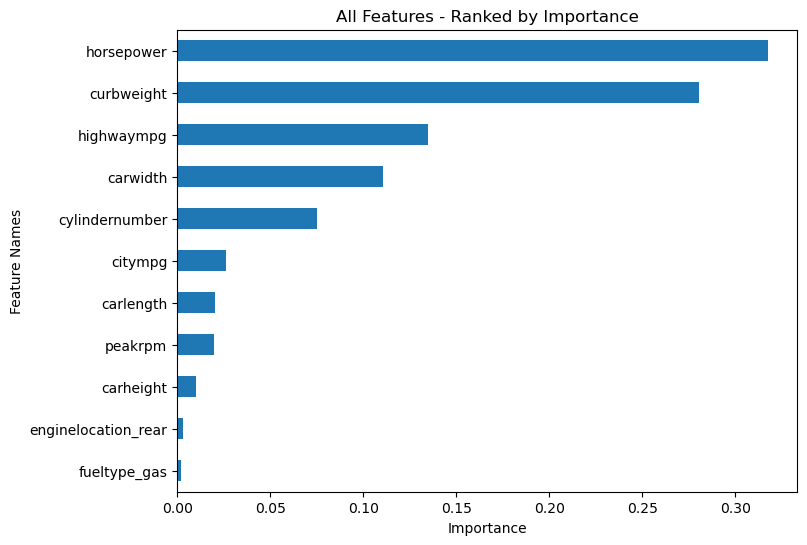

In [23]:
plot_importance(importances, top_n=None,  figsize=(8,6));

**What are the top 6 most important features?**

**Of the top 6 most important features, identify which of these features also appeared in the 3 largest or 3 smallest coefficients.**

## Apply Shap to Explain the Random Forest Model

**Sample 500 rows of the processed X_train data as X_shap, using random_state=321**

In [24]:
# import shap and initialize javascript for interactive shap plots
import shap
shap.initjs()

In [25]:
# how many rows do we have in our data?
len(X_train_proc)

153

In [26]:
X_shap = shap.sample(X_train_proc,
                     nsamples = 500,
                     random_state = 321)
# check
X_shap.info()
X_shap.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 64 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carlength            153 non-null    float64
 1   carwidth             153 non-null    float64
 2   carheight            153 non-null    float64
 3   curbweight           153 non-null    float64
 4   cylindernumber       153 non-null    float64
 5   horsepower           153 non-null    float64
 6   peakrpm              153 non-null    float64
 7   citympg              153 non-null    float64
 8   highwaympg           153 non-null    float64
 9   fueltype_gas         153 non-null    float64
 10  enginelocation_rear  153 non-null    float64
dtypes: float64(11)
memory usage: 14.3 KB


,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
64,177.80,66.50,55.50,"2,425.00",4.00,84.00,"4,800.00",26.00,32.00,1.00,0.00
32,150.00,64.00,52.60,"1,837.00",4.00,60.00,"5,500.00",38.00,42.00,1.00,0.00
165,168.70,64.00,52.60,"2,265.00",4.00,112.00,"6,600.00",26.00,29.00,1.00,0.00
39,175.40,65.20,54.10,"2,304.00",4.00,86.00,"5,800.00",27.00,33.00,1.00,0.00
202,188.80,68.90,55.50,"3,012.00",6.00,134.00,"5,500.00",18.00,23.00,1.00,0.00


**Save the corresponding y_train values as y_shap**

In [27]:
y_shap = y_train.loc[X_shap.index]

# check
y_shap

64    11,245.00
32     5,399.00
165    9,298.00
39     8,845.00
202   21,485.00
         ...   
175    9,988.00
97     7,999.00
56    11,845.00
71    34,184.00
104   17,199.00
Name: price, Length: 153, dtype: float64

**Create a shap model explainer for the random forest model**

In [28]:
explainer = shap.Explainer(RandomForestRegressor)

# check type of explainer
explainer

**Calculate the shap values for the sampled data**

In [29]:
shap_values = explainer(X_shap, y_shap)

# check type of shap_values
type(shap_values)

shap._explanation.Explanation

In [30]:
# check shape of sample of X values provided to explainer
X_shap.shape

(153, 11)

In [31]:
# check shape of shap values
# classifiers will have third dimension
shap_values.shape

(153, 11)

In [32]:
# look at shap values
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
0,260.18,12.39,146.99,-258.67,-351.46,"-1,220.70",-78.94,-45.58,"-1,034.84",-15.53,-6.24
1,-98.15,-609.08,37.04,"-3,273.58",-391.66,"-1,830.85",48.13,-110.05,"-1,355.67",-8.09,-6.20
2,80.66,-510.11,53.17,"-1,827.71",-335.47,-935.86,272.36,-65.44,-327.82,-5.74,-6.22
3,125.69,-563.85,99.17,"-1,107.11",-337.41,"-1,255.03",291.93,-103.39,"-1,063.51",-21.61,-6.24
4,171.74,"2,165.44",211.07,"1,765.46",985.65,-39.62,77.82,241.52,"1,810.55",-16.78,-31.33
...,...,...,...,...,...,...,...,...,...,...,...
148,116.10,-77.16,42.10,-498.90,-392.28,"-1,021.50",177.79,-95.66,"-1,053.07",-24.16,-6.18
149,75.94,-519.10,66.87,"-2,138.54",-352.36,"-1,327.74",-75.99,-12.86,"-1,033.36",-5.12,-6.20
150,-89.84,-123.94,-52.20,"-1,100.10",-260.74,"-1,220.35",283.96,272.07,"1,959.16",-14.33,-6.09
151,757.71,"4,003.04",-30.59,"7,687.59","1,675.72","1,103.86",116.95,487.25,"2,663.80",34.72,-9.51


**Create a summary plot (plot_type =’dot’) of the most important features, according to shap.**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


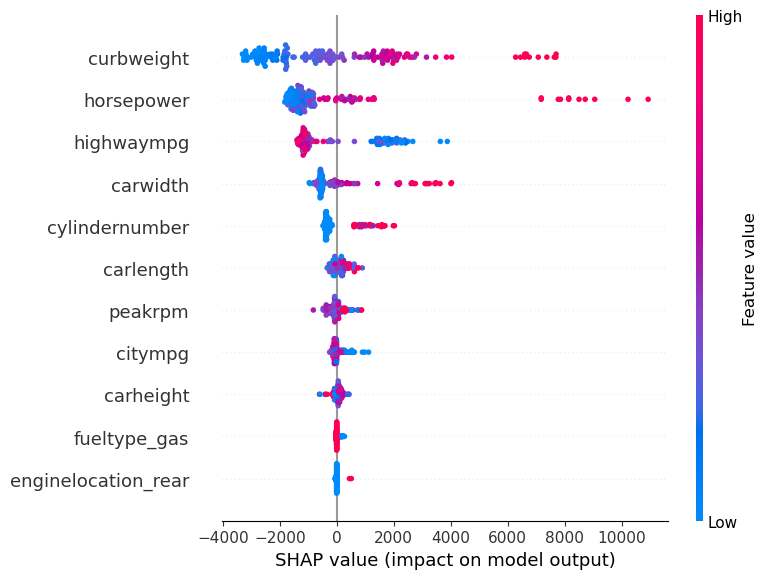

In [33]:
shap.summary_plot(shap_values, X_shap)

How to interpret graph:
- Top listed feature had the largest effect on the model's predictions
- For 'curbweight':
    - Because red values are on the right (positive), the more curbweight the observation had, the higher the model will predict the target.
    - For 'highwaympg', because the red dots are on the left (negative), the higher the highwaympg, the lower the model will predict the target.

Explanation of how to read SHAP summary plots, from Coding Dojo Learn Platform:

- In the summary plot above:
    - Each dot represents an observation/row (in this case, a student).
    - The features are plotted on the y-axis and are sorted from the most impactful features to the least (from top to bottom).
    - The calculated Shapley values for each observation are plotted on the x-axis. The more positive the value, the more the feature pushed the model's prediction towards predicting the current class (for classification).
    - For each feature, the original values of that feature are represented with color.
        - Using the default colormap, blue represents the lowest value in the column and red represents the highest.
            - For one hot encoded categories, blue=0, red = 1.
            - For numeric features: the shade of the color indicates where it falls in the feature's distribution.
- Let's just follow the red dots for each feature. Red means the feature value is higher. For classification:
    - If the red is on the right (positive), higher values of this feature increase the chance the prediction will be fail.
    - If the red is on the left (negative), higher values of this feature decrease the chances the prediction will be fail.




**Interpret the top 6 most important features. According to shap, what effect does each feature have on the model’s prediction?**

# Part 2

**Load the provided csv, located in the zip file you downloaded in Part 1.**

In [34]:
df = pd.read_csv('Data/us-covid-confirmed.csv')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1119 entries, UID to 02022023
dtypes: float64(3), int64(1110), object(6)
memory usage: 28.5+ MB


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,24012023,25012023,26012023,27012023,28012023,29012023,30012023,31012023,01022023,02022023
0,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,...,19389,19471,19471,19471,19471,19471,19471,19471,19530,19530
1,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,...,68764,68983,68983,68983,68983,68983,68983,68983,69187,69187
2,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,...,7258,7299,7299,7299,7299,7299,7299,7299,7339,7339
3,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,...,7889,7919,7919,7919,7919,7919,7919,7919,7967,7967
4,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,...,18130,18255,18255,18255,18255,18255,18255,18255,18349,18349


**Prepare the data as a time series DataFrame:**
- **Melt the wide-form data into a long-form time series.**
    - **The date column should be named “Date”**
    - **The value column should be named “Confirmed”**
- **Convert the Date column to a Datetime index.**
- **Set the Date column as the index**

In [35]:
# check the columns
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '24012023', '25012023', '26012023', '27012023', '28012023', '29012023',
       '30012023', '31012023', '01022023', '02022023'],
      dtype='object', length=1119)

In [36]:
# see more of the front columns to be sure to get all the id vars
df.columns[:20]

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '22012020',
       '23012020', '24012020', '25012020', '26012020', '27012020', '28012020',
       '29012020', '30012020'],
      dtype='object')

In [37]:
id_vars = list(df.columns[:11])

In [38]:
melted = pd.melt(df, id_vars = id_vars)

# check
melted

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,variable,value
0,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",22012020,0
1,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",22012020,0
2,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",22012020,0
3,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",22012020,0
4,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",22012020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702931,84056039,US,USA,840,"56,039.00",Teton,Wyoming,US,43.94,-110.59,"Teton, Wyoming, US",02022023,12058
3702932,84056041,US,USA,840,"56,041.00",Uinta,Wyoming,US,41.29,-110.55,"Uinta, Wyoming, US",02022023,6317
3702933,84090056,US,USA,840,"90,056.00",Unassigned,Wyoming,US,0.00,0.00,"Unassigned, Wyoming, US",02022023,0
3702934,84056043,US,USA,840,"56,043.00",Washakie,Wyoming,US,43.90,-107.68,"Washakie, Wyoming, US",02022023,2729


In [39]:
# rename 'variable' to 'Date' and 'value' to 'Confirmed'
melted = melted.rename(columns = {'variable': 'Date',
                                 'value': 'Confirmed'})

# check
melted

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",22012020,0
1,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",22012020,0
2,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",22012020,0
3,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",22012020,0
4,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",22012020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702931,84056039,US,USA,840,"56,039.00",Teton,Wyoming,US,43.94,-110.59,"Teton, Wyoming, US",02022023,12058
3702932,84056041,US,USA,840,"56,041.00",Uinta,Wyoming,US,41.29,-110.55,"Uinta, Wyoming, US",02022023,6317
3702933,84090056,US,USA,840,"90,056.00",Unassigned,Wyoming,US,0.00,0.00,"Unassigned, Wyoming, US",02022023,0
3702934,84056043,US,USA,840,"56,043.00",Washakie,Wyoming,US,43.90,-107.68,"Washakie, Wyoming, US",02022023,2729


In [40]:
melted['Date'] = pd.to_datetime(melted['Date'], 
                                format = '%d%m%Y')

# check
melted.info()
melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702936 entries, 0 to 3702935
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   UID             int64         
 1   iso2            object        
 2   iso3            object        
 3   code3           int64         
 4   FIPS            float64       
 5   Admin2          object        
 6   Province_State  object        
 7   Country_Region  object        
 8   Lat             float64       
 9   Long_           float64       
 10  Combined_Key    object        
 11  Date            datetime64[ns]
 12  Confirmed       int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 367.3+ MB


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",2020-01-22,0


In [41]:
df_dateind = melted.set_index('Date')

# check
df_dateind

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Confirmed
Date,,,,,,,,,,,,
2020-01-22,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",0
2020-01-22,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",0
2020-01-22,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",0
2020-01-22,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",0
2020-01-22,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,84056039,US,USA,840,"56,039.00",Teton,Wyoming,US,43.94,-110.59,"Teton, Wyoming, US",12058
2023-02-02,84056041,US,USA,840,"56,041.00",Uinta,Wyoming,US,41.29,-110.55,"Uinta, Wyoming, US",6317
2023-02-02,84090056,US,USA,840,"90,056.00",Unassigned,Wyoming,US,0.00,0.00,"Unassigned, Wyoming, US",0


**Filter the data:**
- **Keep data from the following states:**
    - **'New York', "New Jersey", "Pennsylvania", 'Delaware', 'Rhode Island', 'Maryland', "Virginia", "North Carolina"**
- **Keep all data from 05/2020 to the present.**

In [44]:
states_to_keep = ['New York', 'New Jersey', 'Pennsylvania',
                 'Delaware', 'Rhode Island', 'Maryland',
                 'Virginia', 'North Carolina']

df_filtered = df_dateind[df_dateind['Province_State'].isin(states_to_keep)]

# check
df_filtered['Province_State'].unique()

array(['Delaware', 'Maryland', 'New Jersey', 'New York', 'North Carolina',
       'Pennsylvania', 'Rhode Island', 'Virginia'], dtype=object)

In [45]:
df_filtered = df_filtered[df_filtered.index >= '2020-05-01']

# check
df_filtered.index

DatetimeIndex(['2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01',
               '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01',
               '2020-05-01', '2020-05-01',
               ...
               '2023-02-02', '2023-02-02', '2023-02-02', '2023-02-02',
               '2023-02-02', '2023-02-02', '2023-02-02', '2023-02-02',
               '2023-02-02', '2023-02-02'],
              dtype='datetime64[ns]', name='Date', length=434448, freq=None)

**Save the processed data as a  .csv file in a “Data” folder inside your private repo, name the csv “Data/data-for-tableau.csv”**

In [47]:
df_filtered.to_csv('Data/data-for-tableau.csv')

**Resample the cases, grouped by states, to monthly frequency (based on the beginning of the calendar month) using sum as the aggregate function.**

In [53]:
df_filtered

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Confirmed
Date,,,,,,,,,,,,
2020-05-01,84010001,US,USA,840,"10,001.00",Kent,Delaware,US,39.09,-75.57,"Kent, Delaware, US",773
2020-05-01,84010003,US,USA,840,"10,003.00",New Castle,Delaware,US,39.58,-75.64,"New Castle, Delaware, US",1829
2020-05-01,84080010,US,USA,840,"80,010.00",Out of DE,Delaware,US,0.00,0.00,"Out of DE, Delaware, US",0
2020-05-01,84010005,US,USA,840,"10,005.00",Sussex,Delaware,US,38.66,-75.39,"Sussex, Delaware, US",2292
2020-05-01,84090010,US,USA,840,"90,010.00",Unassigned,Delaware,US,0.00,0.00,"Unassigned, Delaware, US",24
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,84051830,US,USA,840,"51,830.00",Williamsburg,Virginia,US,37.28,-76.71,"Williamsburg, Virginia, US",2280
2023-02-02,84051840,US,USA,840,"51,840.00",Winchester,Virginia,US,39.17,-78.17,"Winchester, Virginia, US",8107
2023-02-02,84051195,US,USA,840,"51,195.00",Wise,Virginia,US,36.97,-82.62,"Wise, Virginia, US",13721


In [52]:
df_ts = df_filtered.groupby('Province_State').resample('MS').sum(numeric_only = True)

# check
df_ts

UID    code3           FIPS        Lat  \
Province_State Date                                                          
Delaware       2020-05-01   13026200899   130200   6,200,899.00   3,637.16   
               2020-06-01   12606000870   126000   6,000,870.00   3,519.83   
               2020-07-01   13026200899   130200   6,200,899.00   3,637.16   
               2020-08-01   13026200899   130200   6,200,899.00   3,637.16   
               2020-09-01   12606000870   126000   6,000,870.00   3,519.83   
...                                 ...      ...            ...        ...   
Virginia       2022-10-01  351756634603  3515400 216,634,603.00 154,885.24   
               2022-11-01  340409646390  3402000 209,646,390.00 149,888.94   
               2022-12-01  351756634603  3515400 216,634,603.00 154,885.24   
               2023-01-01  351756634603  3515400 216,634,603.00 154,885.24   
               2023-02-01   22693976426   226800  13,976,426.00   9,992.60   

                                Long_  Confirmed  
Province_State Date                               
Delaware       2020-05-01   -7,024.59     229083  
               2020-06-01   -6,797.99     312601  
               2020-07-01   -7,024.59     410198  
               2020-08-01   -7,024.59     503506  
               2020-09-01   -6,797.99     572135  
...                               ...        ...  
Virginia       2022-10-01 -323,712.03   65231936  
               2022-11-01 -313,269.71   64045669  
               2022-12-01 -323,712.03   67443271  
               2023-01-01 -323,712.03   69192486  
               2023-02-01  -20,884.65    4521592  

[272 rows x 6 columns]

**Plot a line graph with each of the states as a separate line.**

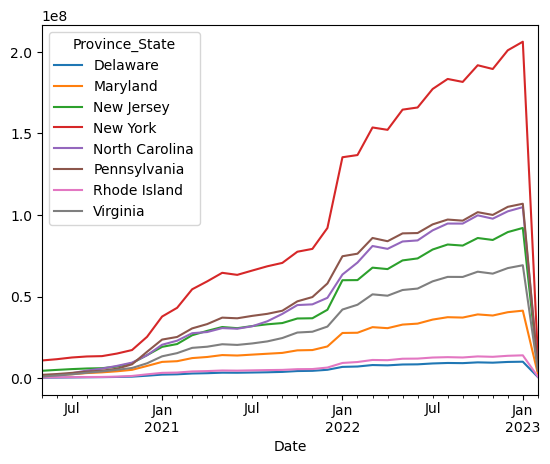

In [61]:
plot_df = df_ts.copy()
unstacked = plot_df.unstack(level = 0)
ax = unstacked['Confirmed'].plot()

# Part 3